#Steps taken to complete this process
###1) Import required library 
###2) Tmport the dataset via google drive 
###3) Pre-process the data accordingly
###4) Select the model or the algorithm (CNN using InceptionV3)
###5) Build the model
###6) Separate your train and test data
###7) Then fit the model according to your train data
###8) Predict using test data and see the results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 17 kB/s 


##Importing libraries for CNN 

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from glob import glob
from keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
from matplotlib import pyplot as plt


In [ ]:
IMAGE_SIZE = [224,224]
train_path = "/content/drive/MyDrive/Dataset/train"
valid_path = "/content/drive/MyDrive/Dataset/valid"

In [ ]:
##Creating the inception layer
inception = InceptionV3(include_top=False,weights='imagenet',input_shape=IMAGE_SIZE+[3])

87924736/87910968 [==============================] - 1s 0us/step


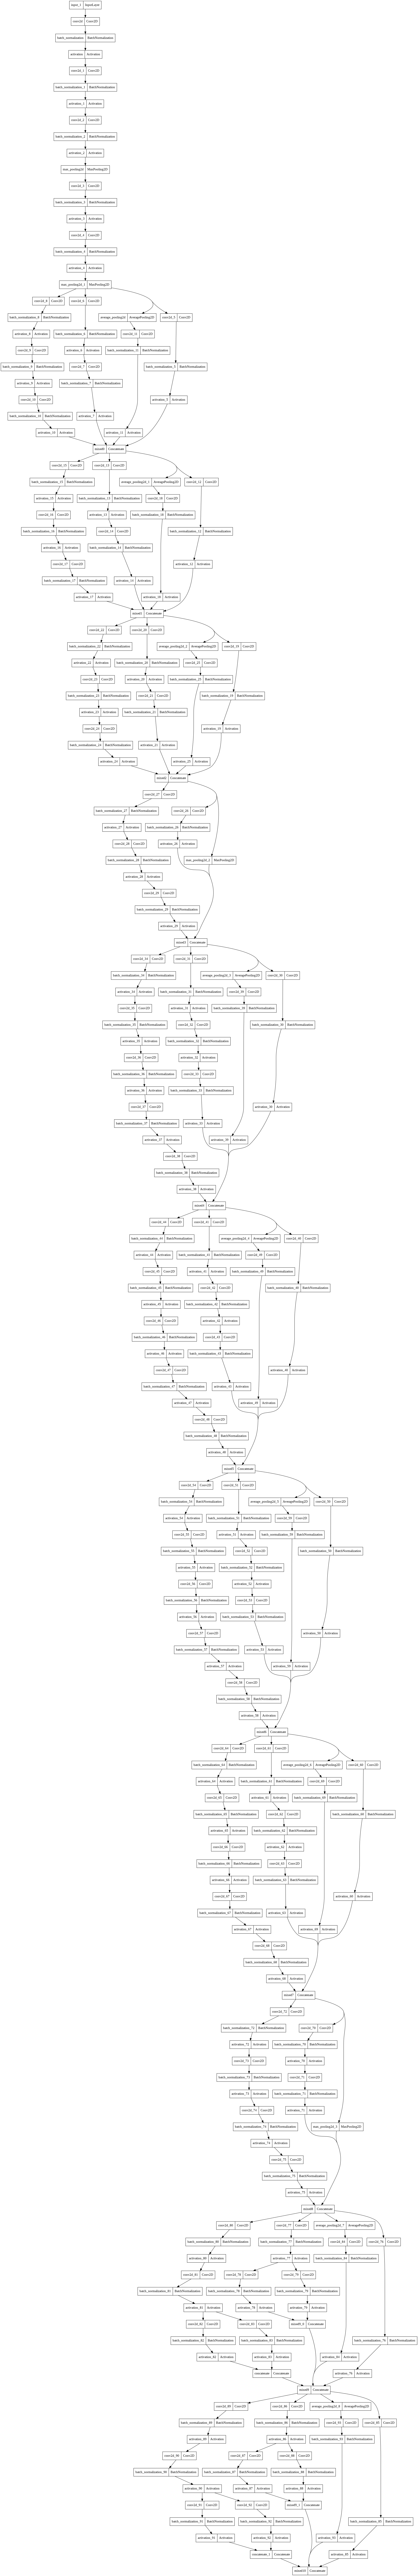

In [ ]:
plot_model(inception,to_file='model.png')

In [ ]:
#avoid training existing weights\
#to avoid back-propagation
for layer in inception.layers:
  layer.trainable = False

In [ ]:
#will be used as no. of output layers
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Dataset/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Dataset/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Dataset/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Dataset/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Dataset/train/Tomato___healthy',
 '/content/drive/MyDrive/Dataset/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Dataset/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Dataset/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Dataset/train/Tomato___Early_blight']

In [ ]:
#flatten the output of inception model
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)

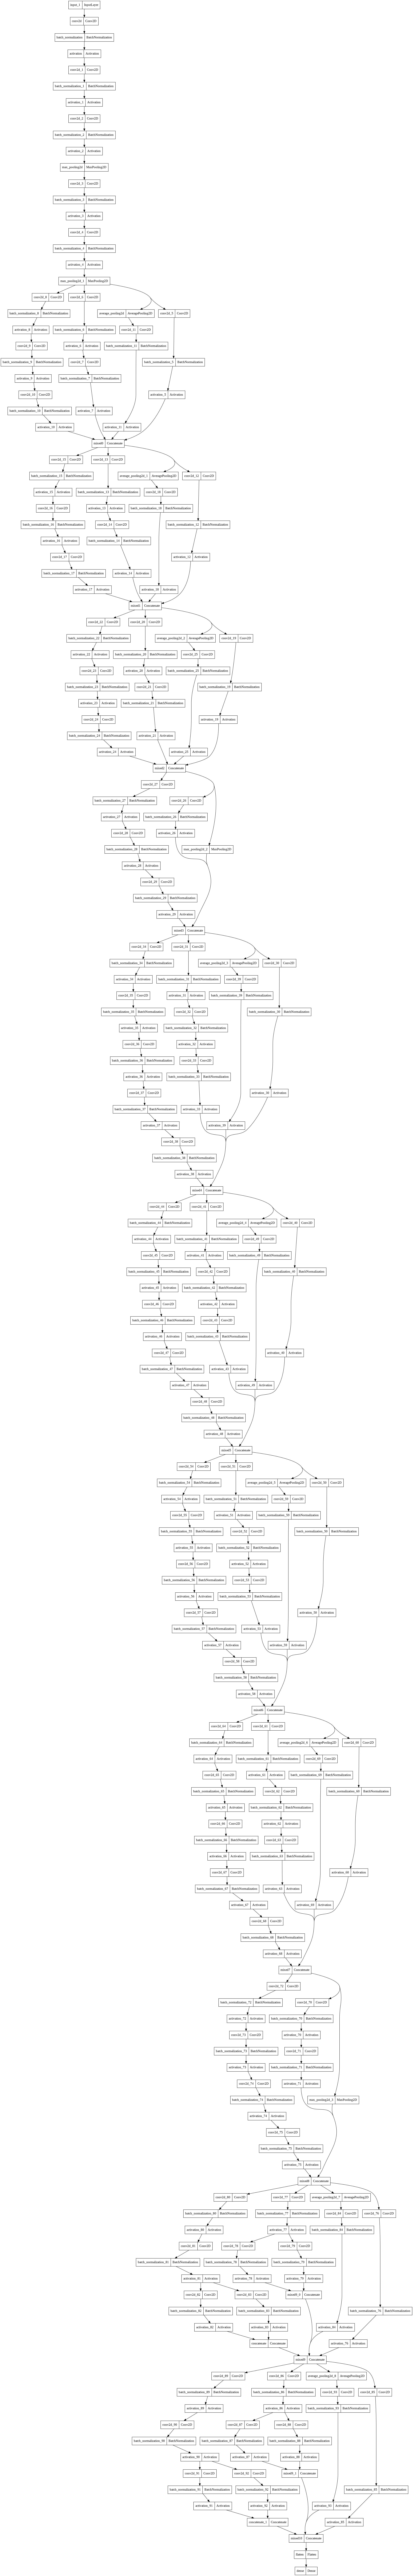

In [ ]:
#create model
model = Model(inputs=inception.input,outputs = prediction)
plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
#For compiling the model
#For attempting to reduce the loss value by an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
#ImageDataGenerator used to import all the images present in my drive/dataset in to my model
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Dataset/train",target_size = (224, 224), batch_size = 32,class_mode = 'categorical')


Found 18345 images belonging to 10 classes.


In [ ]:
test_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Dataset/valid", target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

cnn = model.fit_generator (
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/8
574/574 [==============================] - 4754s 8s/step - loss: 2.8792 - accuracy: 0.6819 - val_loss: 2.8292 - val_accuracy: 0.7335
Epoch 2/8
574/574 [==============================] - 2672s 5s/step - loss: 2.3364 - accuracy: 0.7834 - val_loss: 2.3022 - val_accuracy: 0.7983
Epoch 3/8
574/574 [==============================] - 2658s 5s/step - loss: 2.2553 - accuracy: 0.8146 - val_loss: 2.9248 - val_accuracy: 0.8072
Epoch 4/8
574/574 [==============================] - 2672s 5s/step - loss: 1.9442 - accuracy: 0.8461 - val_loss: 3.2871 - val_accuracy: 0.7900
Epoch 5/8
574/574 [==============================] - 2659s 5s/step - loss: 1.9091 - accuracy: 0.8543 - val_loss: 2.6371 - val_accuracy: 0.8347
Epoch 6/8
574/574 [==============================] - 2655s 5s/step - loss: 1.7716 - accuracy: 0.8678 - val_loss: 3.9415 - val_accuracy: 0.7699
Epoch 7/8
574/574 [==============================] - 2653s 5s/step - loss: 1.7853 - accuracy: 0.8741 - val_loss: 1.9993 - val_accuracy: 0.8641

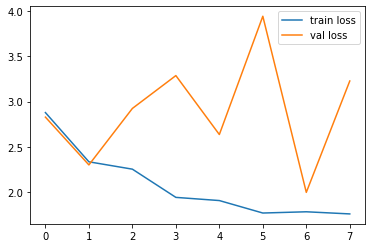

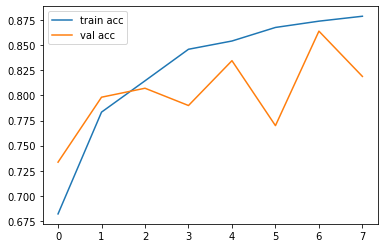

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the Loss 
plt.plot(cnn.history['loss'], label='train loss') 
plt.plot(cnn.history['val_loss'], label='val loss') 
plt.legend() 
plt.show() 
plt.savefig('LossVal_loss')

# plot the accuracy 
plt.plot(cnn.history['accuracy'], label='train acc') 
plt.plot(cnn.history['val_accuracy'], label='val acc') 
plt.legend() 
plt.show() 
plt.savefig('AccVal_acc')


In [ ]:
model.evaluate(test_set)

144/144 [==============================] - 525s 4s/step - loss: 3.1468 - accuracy: 0.8216


[3.146756887435913, 0.8215921521186829]